In [110]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from matplotlib import pyplot as plt

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['shops.csv', 'item_categories.csv', 'sales_train.csv', 'items.csv', 'sample_submission.csv', 'test.csv']


In [111]:
df = pd.read_csv('../input/sales_train.csv')
df.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
2,05.01.2013,0,25,2552,899.00,-1.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0


In [112]:
df_items = pd.read_csv('../input/items.csv')
df_items.head()

,item_name,item_id,item_category_id
0,! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.) D,0,40
1,!ABBYY FineReader 12 Professional Edition Full...,1,76
2,***В ЛУЧАХ СЛАВЫ (UNV) D,2,40
3,***ГОЛУБАЯ ВОЛНА (Univ) D,3,40
4,***КОРОБКА (СТЕКЛО) D,4,40


In [113]:
df = pd.merge(df, df_items.drop('item_name', axis = 1), on='item_id')
df.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,item_category_id
0,02.01.2013,0,59,22154,999.0,1.0,37
1,23.01.2013,0,24,22154,999.0,1.0,37
2,20.01.2013,0,27,22154,999.0,1.0,37
3,02.01.2013,0,25,22154,999.0,1.0,37
4,03.01.2013,0,25,22154,999.0,1.0,37


In [114]:
df['amount'] = df['item_price'] * df['item_cnt_day']
df.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,item_category_id,amount
0,02.01.2013,0,59,22154,999.0,1.0,37,999.0
1,23.01.2013,0,24,22154,999.0,1.0,37,999.0
2,20.01.2013,0,27,22154,999.0,1.0,37,999.0
3,02.01.2013,0,25,22154,999.0,1.0,37,999.0
4,03.01.2013,0,25,22154,999.0,1.0,37,999.0


In [115]:
df = df.drop('date_block_num', axis = 1)
df['month'] = df['date'].apply(lambda x: x.split('.')[1])
df = df.drop('date', axis = 1)
df.head()

,shop_id,item_id,item_price,item_cnt_day,item_category_id,amount,month
0,59,22154,999.0,1.0,37,999.0,01
1,24,22154,999.0,1.0,37,999.0,01
2,27,22154,999.0,1.0,37,999.0,01
3,25,22154,999.0,1.0,37,999.0,01
4,25,22154,999.0,1.0,37,999.0,01


In [ ]:
df[['shop_id', 'amount']].plot(kind='scatter', x='shop_id', y='amount')

In [ ]:
df[['item_price', 'amount']].plot(kind='scatter', x='item_price', y='amount')

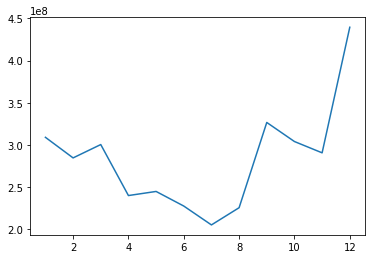

In [117]:
df['month'] = df['month'].astype(int)
plt.plot(df[['month', 'amount']].groupby('month').sum())

In [ ]:
df[['shop_id','item_id','item_category_id']] = df[['shop_id','item_id','item_category_id']].astype(np.object)
df.info()

In [ ]:
df = pd.get_dummies(df, columns=['month','item_category_id'])
df.info()

In [ ]:
df.head()